In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('World Largest Cities by Population 2024.csv')
df.head()

,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate
0,0,Tokyo,Japan,37115035,37194105,-0.0021
1,1,Delhi,India,33807403,32941309,0.0263
2,2,Shanghai,China,29867918,29210808,0.0225
3,3,Dhaka,Bangladesh,23935652,23209616,0.0313
4,4,Sao Paulo,Brazil,22806704,22619736,0.0083


In [3]:
df['Ranking'] = df['Unnamed: 0']+1
df.head()

,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate,Ranking
0,0,Tokyo,Japan,37115035,37194105,-0.0021,1
1,1,Delhi,India,33807403,32941309,0.0263,2
2,2,Shanghai,China,29867918,29210808,0.0225,3
3,3,Dhaka,Bangladesh,23935652,23209616,0.0313,4
4,4,Sao Paulo,Brazil,22806704,22619736,0.0083,5


In [4]:
df.drop(['Unnamed: 0'], inplace=True,axis = 1)

In [5]:
df.head()

,City,Country,Population (2024),Population (2023),Growth Rate,Ranking
0,Tokyo,Japan,37115035,37194105,-0.0021,1
1,Delhi,India,33807403,32941309,0.0263,2
2,Shanghai,China,29867918,29210808,0.0225,3
3,Dhaka,Bangladesh,23935652,23209616,0.0313,4
4,Sao Paulo,Brazil,22806704,22619736,0.0083,5


In [6]:
df.columns

Index(['City', 'Country', 'Population (2024)', 'Population (2023)',
       'Growth Rate', 'Ranking'],
      dtype='object')

In [7]:
df = df[['Ranking','City', 'Country', 'Population (2024)', 'Population (2023)','Growth Rate']]
df.head()

,Ranking,City,Country,Population (2024),Population (2023),Growth Rate
0,1,Tokyo,Japan,37115035,37194105,-0.0021
1,2,Delhi,India,33807403,32941309,0.0263
2,3,Shanghai,China,29867918,29210808,0.0225
3,4,Dhaka,Bangladesh,23935652,23209616,0.0313
4,5,Sao Paulo,Brazil,22806704,22619736,0.0083


In [8]:
df.isnull().sum()

Ranking              0
City                 0
Country              0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            801 non-null    int64  
 1   City               801 non-null    object 
 2   Country            801 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 37.7+ KB


In [11]:
df.describe()

,Ranking,Population (2024),Population (2023),Growth Rate
count,801.000000,8.010000e+02,8.010000e+02,801.000000
mean,401.000000,2.654327e+06,2.604461e+06,0.020051
std,231.373075,3.723253e+06,3.661201e+06,0.012180
min,1.000000,7.500360e+05,7.228360e+05,-0.024900
25%,201.000000,9.909310e+05,9.698040e+05,0.012200
50%,401.000000,1.379368e+06,1.363510e+06,0.019700
75%,601.000000,2.570980e+06,2.514077e+06,0.026600
max,801.000000,3.711504e+07,3.719410e+07,0.058200


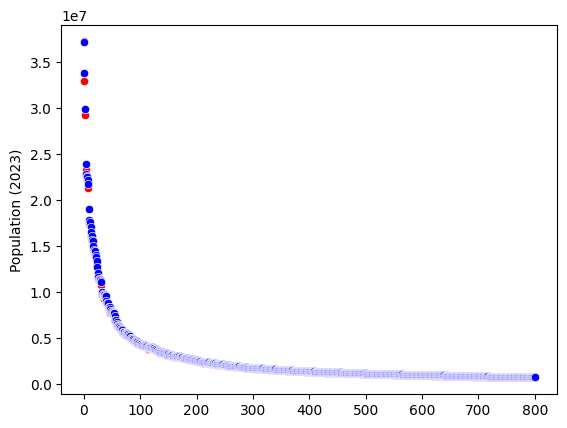

In [12]:
sns.scatterplot(df['Population (2023)'],color = 'r')
sns.scatterplot(df['Population (2024)'],color = 'b')
plt.show()

<Axes: ylabel='Growth Rate'>

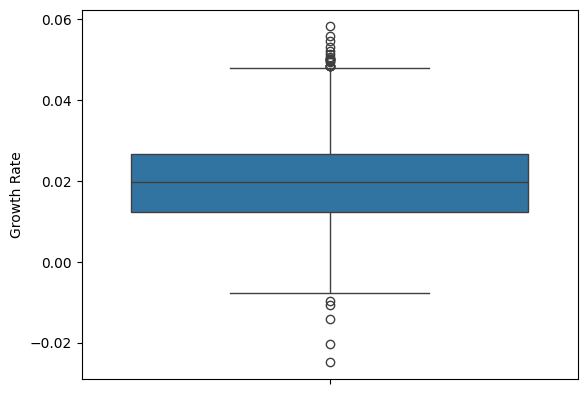

In [13]:
sns.boxplot(df['Growth Rate'])

<Axes: ylabel='Population (2023)'>

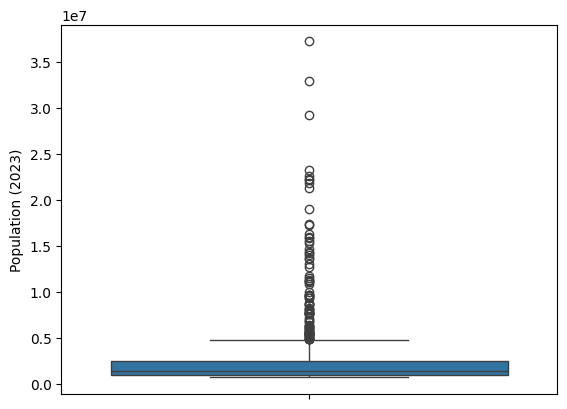

In [14]:
sns.boxplot(df['Population (2023)'])

<Axes: ylabel='Population (2024)'>

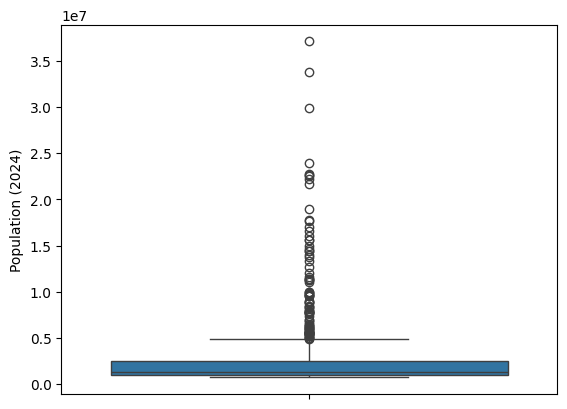

In [15]:
sns.boxplot(df['Population (2024)'])

In [16]:
Q1 = df['Growth Rate'].quantile(0.25)
Q3 = df['Growth Rate'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [17]:
df[df['Growth Rate']>upper_limit]

,Ranking,City,Country,Population (2024),Population (2023),Growth Rate
47,48,Dar Es Salaam,Tanzania,8161231,7775865,0.0496
113,114,Kampala,Uganda,4050826,3846102,0.0532
116,117,Abuja,Nigeria,4025735,3839646,0.0485
146,147,Ouagadougou,Burkina Faso,3358934,3203923,0.0484
226,227,Aleppo,Syria,2317650,2203025,0.0520
395,396,Uyo,Nigeria,1393453,1329284,0.0483
403,404,Mwanza,Tanzania,1378014,1310754,0.0513
429,430,Abomey Calavi,Benin,1314916,1252890,0.0495
436,437,Nnewi,Nigeria,1300993,1239186,0.0499
451,452,Bujumbura,Burundi,1277050,1206767,0.0582


In [18]:
df[df['Growth Rate']<lower_limit]

,Ranking,City,Country,Population (2024),Population (2023),Growth Rate
48,49,New York,United States,7931147,8133522,-0.0249
129,130,Los Angeles,United States,3748640,3785439,-0.0097
199,200,Chicago,United States,2590002,2627520,-0.0143
355,356,Philadelphia,United States,1533916,1550587,-0.0107
645,646,San Jose,United States,932636,951934,-0.0203


In [19]:
df_clean = df[(df['Growth Rate']<upper_limit) & (df['Growth Rate']>lower_limit)]
df_clean

,Ranking,City,Country,Population (2024),Population (2023),Growth Rate
0,1,Tokyo,Japan,37115035,37194105,-0.0021
1,2,Delhi,India,33807403,32941309,0.0263
2,3,Shanghai,China,29867918,29210808,0.0225
3,4,Dhaka,Bangladesh,23935652,23209616,0.0313
4,5,Sao Paulo,Brazil,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,797,Bhavnagar,India,751493,737128,0.0195
797,798,Sheffield,United Kingdom,751303,745876,0.0073
798,799,Huambo,Angola,751297,727641,0.0325
799,800,Ribeirao Preto,Brazil,750174,742115,0.0109


<Axes: ylabel='Growth Rate'>

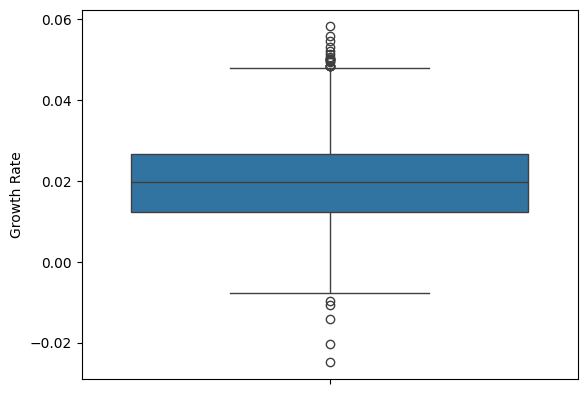

In [20]:
sns.boxplot(df['Growth Rate'])